<a href="https://colab.research.google.com/github/Arvinth-s/Dark-Sight/blob/master/DFT_DarkSight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#OM NAMO NARAYANA

In [5]:
from google.colab import drive
import numpy as np
import os
drive.flush_and_unmount()
drive.mount('/content/drive')
dsdir='/content/drive/My Drive/Dataset/'
sampledir = '/content/drive/My Drive/Dataset/sampleDataset'
f = open(dsdir+'DFT_Analysis/logs.txt', 'w')
# sf = open(sampledir + '/logs.txt', 'w')
f.write('successfully mounted drive\n')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


27

In [6]:
import shutil
dataset_dir = '/content/drive/My Drive/Dataset/Dataset/'
os.chdir(dsdir)
!ls
os.chdir(dataset_dir)
f.write('Dataset exists\n')

Dataset       logs.txt		  myFile_raw.txt
DFT_Analysis  myFile_jpg.txt	  sampleDataset
files_gen.py  myFile_raw_jpg.txt  sampleDatasetlogs.txt


15

In [7]:
subdirs=[]
f.write('Dataset extracted\n')
for path, sd, files in os.walk(dataset_dir):
    if(sd != []):
      subdirs.append(sd)
subdirs=subdirs[0]
A=[]
for subdir in subdirs:
  a = list(os.listdir(subdir))
  a.sort()
  if(len(a)==10):
    a.append(subdir)
    A.append(a)
A = np.array(A)
longExposure=[]
shortExposure=[]
temperature=[]
longExposure = [dataset_dir + a[10] + "/" + a[4] for a in A]
shortExposure =[dataset_dir + a[10] + "/" +a[5] for a in A]
temperature = [dataset_dir + a[10] + "/" +a[6] for a in A]
f.write('Dataset extracted\n')

18

In [27]:
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from PIL import Image


In [28]:

class ImageDataset():
    def __init__(self, image_list):
        self.image_list = image_list
         
    def __len__(self):
        print(len(self.image_list[0]))
        return (len(self.image_list[0]))

    
    def __getitem__(self, i):
        image = []
        image = [plt.imread(self.image_list[j][i]) for j in range(3)]
        image = [Image.fromarray(img).convert('RGB')  for img in image]
        image = [np.asarray(img).astype(np.uint8) for img in image]
        return image

3


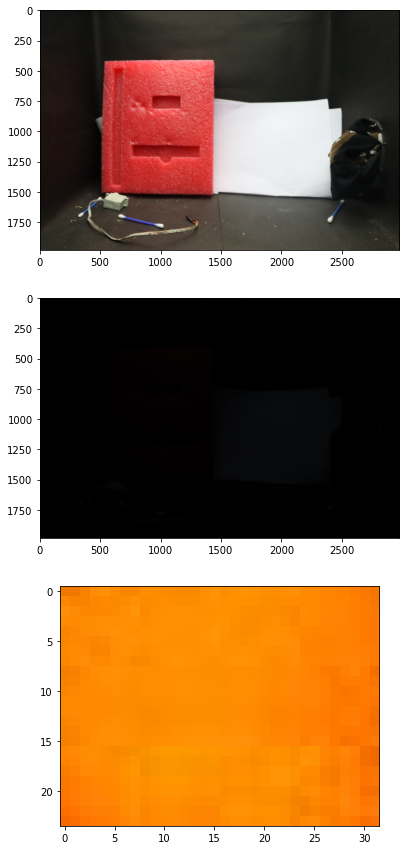

In [38]:
image_list = [longExposure, shortExposure, temperature]
data = ImageDataset(image_list=image_list)
print(len(data[0]))
fig, a = plt.subplots(3,1,figsize=(15,15))
for i in range(3):
  a[i].imshow(data[0][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


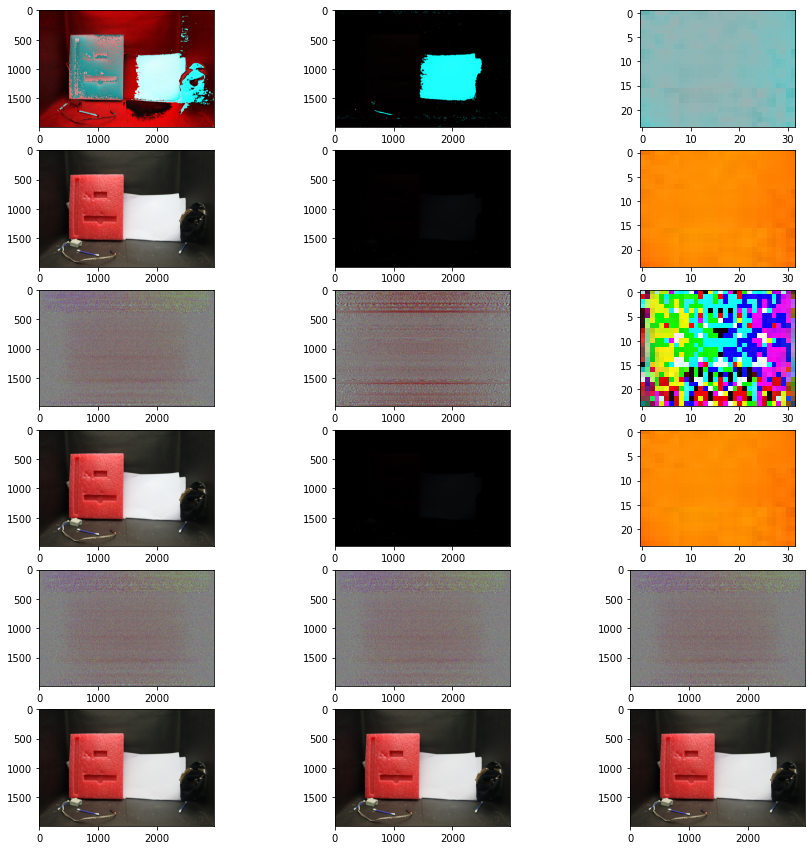

In [62]:
fig, s = plt.subplots(6, 3, figsize=(15,15))
for i in range(3):
  s[0][i].imshow(np.fft.fft(data[0][i]).astype(np.uint8))
  s[1][i].imshow(np.fft.ifft(np.fft.fft(data[0][i])).astype(np.uint8))
  s[2][i].imshow(np.fft.fft2(data[0][i]).astype(np.uint8))
  s[3][i].imshow(np.fft.ifft2(np.fft.fft2(data[0][i])).astype(np.uint8))
  s[4][i].imshow((np.fft.fft2(data[0][0])-np.fft.fft2(data[0][1])).astype(np.uint8))
  s[5][i].imshow(np.fft.ifft2(np.fft.fft2(data[0][0])-np.fft.fft2(data[0][1])).astype(np.uint8))
  # s[2][i].imshow(np.fft.rfft(data[0][i]).astype(np.uint8))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


(1984, 2976, 3)
(1984, 2976, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


(1984, 2976, 3)
(1984, 2976, 3)
(1984, 2976, 3)
(1984, 2976, 3)
(1984, 2976, 3)
(1984, 2976, 3)
(1984, 2976, 3)
(1984, 2976, 3)


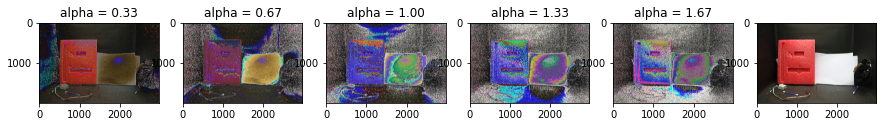

In [90]:
alpha = range(1, 10)
dark = np.fft.fft2(data[0][1])
light = np.fft.fft2(data[0][0])
fig, s = plt.subplots(1, 6, figsize=(15,15))
s[5].imshow(np.fft.ifft2(light).astype(np.uint8))
for i in range(5):
  mdark = 3* np.mean(dark)/alpha[i]
  mlight = np.mean(light)
  print(dark.shape)
  merge = light - (mlight/mdark) * dark
  print(merge.shape)
  s[i].imshow(np.fft.ifft2(merge).astype(np.uint8))
  s[i].set_title('alpha = {0:.2f}'.format(alpha[i]/3) )

"alpha" is the scaling factor for dark images. As alpha increases the blue shad increases. The above images are formed from subtracting fft2d from each other and normalized w.r.t mean.